This project assumes a stock follows a geometric brownian motion aka a continuous time random walk with a drift

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
%matplotlib inline 
import yfinance as yf 

In [90]:
ticker = "AAPL"  
start_date = "2020-01-01"
end_date = "2024-07-09"
data = yf.download(ticker, start=start_date, end=end_date)
closing_prices= data[['Close']]
closing_prices

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620842
2020-01-03,71.914810
2020-01-06,72.487846
2020-01-07,72.146950
2020-01-08,73.307510
...,...
2024-07-01,215.741043
2024-07-02,219.244659


In [91]:
closing_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1135 entries, 2020-01-02 to 2024-07-08
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, AAPL)  1135 non-null   float64
dtypes: float64(1)
memory usage: 17.7 KB


In [92]:
closing_prices.head()

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.620842
2020-01-03,71.914810
2020-01-06,72.487846
2020-01-07,72.146950
2020-01-08,73.307510


In [93]:
#calculate the logarithmic retruns from the percent changes 
#More suitable means for analysis 
# Formula: log_return = ln(1 + simple_return)
log_returns = np.log(1 + data.pct_change())

In [94]:
log_returns.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.000067,0.004428,0.003067,0.076988
2020-01-06,0.007937,-0.002065,-0.012728,-0.011372,-0.211855
2020-01-07,-0.004714,0.003129,0.016028,0.020384,-0.083788
2020-01-08,0.015958,0.011696,-0.001077,-0.008978,0.193229


In [95]:
#plot the closing prices and the returns

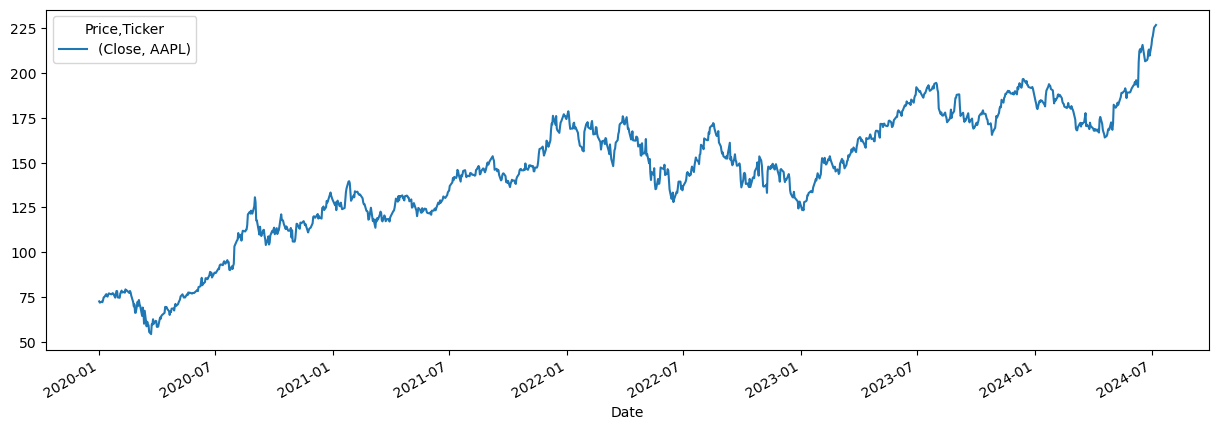

In [96]:
closing_prices.plot(figsize = (15,5))
plt.show()

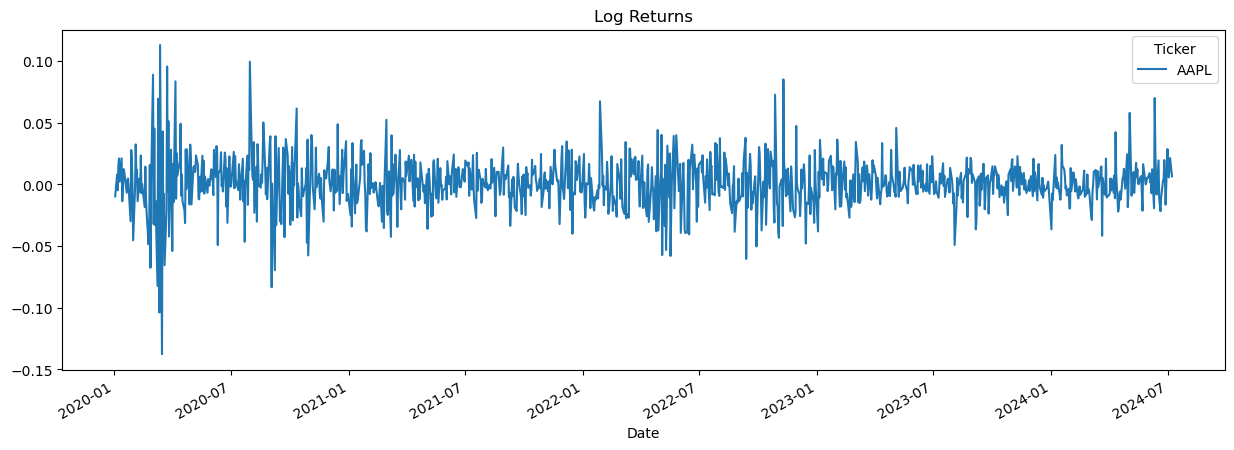

In [97]:
#only focused on the closing price of chosen stock
log_returns["Close"].plot(figsize = (15,5))
plt.title("Log Returns")
plt.show()

In [98]:
#from here we will analyze whether the returns follow a normal distribution pattern
#The time-span will most defintely have an affect on this
#the longer the time period, the more the normal distribution will form
#Also look to see if there is a stable mean ACHIEVED OVER TIME

In [99]:
u = log_returns["Close"].mean()
u

Ticker
AAPL    0.001004
dtype: float64

In [100]:
variance = log_returns["Close"].var()
variance

Ticker
AAPL    0.000423
dtype: float64

In [101]:
# Calculate the drift term for a stochastic process
# In financial modeling, drift represents the expected return adjusted for volatility
drift = u - (.5 * variance)  # Formula: mean return minus half of variance
drift 

Ticker
AAPL    0.000793
dtype: float64

In [102]:
# Calculate the standard deviation of log returns to measure volatility
stdev = log_returns["Close"].std()
stdev 

Ticker
AAPL    0.020567
dtype: float64

In [103]:
type(drift)

pandas.core.series.Series

In [104]:
type(stdev)

pandas.core.series.Series

In [105]:
#Next we should convert the variables into a numpy array
#More efficient data structure and enables numerical operations
np.array(drift)

array([0.0007926])

In [106]:
np.array(stdev)

array([0.02056658])

In [107]:
norm.ppf(0.95)

1.6448536269514722

In [108]:
norm.ppf(0.95)
# Calculate the z-score (number of standard deviations from the mean) 
# corresponding to the 95th percentile of the standard normal distribution
# This returns approximately 1.645, meaning that 95% of values in a normal
# distribution fall below 1.645 standard deviations above the mean

1.6448536269514722

In [109]:
#Generate a random array with 10 rows and 2 columns, with values between 0 and 1
rand_array = np.random.rand(10,2)
rand_array

array([[0.55864077, 0.63670756],
       [0.22412027, 0.30984981],
       [0.7619461 , 0.37375749],
       [0.69923237, 0.74002368],
       [0.1321803 , 0.95583272],
       [0.2007974 , 0.58309575],
       [0.49911078, 0.69262571],
       [0.78172304, 0.78574313],
       [0.11588417, 0.36793429],
       [0.72838795, 0.66155736]])

In [110]:
#next calc the percent point function (Invesrse CDF) at our random points
#Returns the value where the CDF equals x 
#for standard norm dist. this gives z score for the given probability
norm.ppf(rand_array)

array([[ 0.14752398,  0.34967198],
       [-0.75835156, -0.49627611],
       [ 0.7125766 , -0.32191777],
       [ 0.52219402,  0.6434184 ],
       [-1.11614375,  1.70424905],
       [-0.83877639,  0.20981956],
       [-0.00222896,  0.50330681],
       [ 0.77802559,  0.79173753],
       [-1.19581606, -0.33732942],
       [ 0.60794477,  0.41671719]])

In [111]:
#Generate a 10x2 array of random values from a standard normal distribution 
## First creates uniform random values between 0-1, then transforms them using 
# the percent point function (inverse of CDF) of the normal distribution
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.74212837, -0.48373535],
       [-1.01370751,  0.71539068],
       [-0.16833009, -0.03341298],
       [ 1.50745495, -1.08176783],
       [-0.42213671, -1.01220665],
       [ 0.27231906,  0.80936203],
       [-0.24276988, -0.16018958],
       [-1.05512216,  0.93429346],
       [ 0.26892786,  1.29128211],
       [-0.35003243,  0.66149444]])

In [123]:
# Number of time intervals to simulate
t_intervals = 251
iterations = 10000

In [124]:
# Calculate daily returns using the formula: S(t)/S(t-1) = e^(μ-σ²/2)Δt + σ√Δt * Z
# where Z is a random variable following standard normal distribution
# - np.exp() calculates the exponential of each element
# - drift represents (μ-σ²/2)Δt (expected return component)
# - stdev * norm.ppf(random) represents σ√Δt * Z (random volatility component)
# - Creates a matrix of shape (t_intervals, iterations) for Monte Carlo simulation
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.01371788, 0.98770154, 0.99281433, ..., 0.99259562, 1.01507678,
        1.0036357 ],
       [1.00840496, 0.9964389 , 0.95867182, ..., 0.99991968, 0.97636384,
        0.98543075],
       [0.99447645, 0.98799478, 1.03488014, ..., 0.97091818, 0.9539639 ,
        1.01011874],
       ...,
       [1.01702686, 1.00414635, 1.00651653, ..., 0.98108379, 0.99344008,
        1.05541975],
       [1.018901  , 1.01050238, 0.99884506, ..., 1.01624785, 1.01743974,
        1.01359321],
       [1.00298891, 0.99422917, 0.99964891, ..., 0.99752875, 0.97621011,
        0.98524293]])

In [125]:
#results in a matrix with 10 columns and 100 rows simulating different daily returns

In [126]:
S0 = closing_prices.iloc[-1]
S0
#grabs the last price in our closing price data frame

Price  Ticker
Close  AAPL      226.759537
Name: 2024-07-08 00:00:00, dtype: float64

In [127]:
closing_prices.tail() 

Price,Close
Ticker,AAPL
Date,
2024-07-01,215.741043
2024-07-02,219.244659
2024-07-03,220.518707
2024-07-05,225.286407
2024-07-08,226.759537


In [128]:
# Create an array of zeros with the same shape as daily_returns
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
# we can now replace these zeros with the stock prices using a loop

In [130]:
price_list[0] = S0 
price_list

array([[226.75953674, 226.75953674, 226.75953674, ..., 226.75953674,
        226.75953674, 226.75953674],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [131]:
for t in range(1, t_intervals): 
    price_list[t] = price_list[t-1] * daily_returns[t]

price_list

array([[226.75953674, 226.75953674, 226.75953674, ..., 226.75953674,
        226.75953674, 226.75953674],
       [228.66544136, 225.95202289, 217.38797853, ..., 226.74132286,
        221.39981185, 223.45582104],
       [227.40239748, 223.23942021, 224.97050187, ..., 220.14727331,
        211.20742787, 225.71691309],
       ...,
       [331.24485266, 372.16617501, 223.63280683, ..., 227.97076419,
        399.58877633, 358.39319304],
       [337.50571299, 376.07480661, 223.37452404, ..., 231.674798  ,
        406.55749958, 363.26490574],
       [338.51448728, 373.90454318, 223.29609884, ..., 231.10227116,
        396.88554001, 357.90417892]])

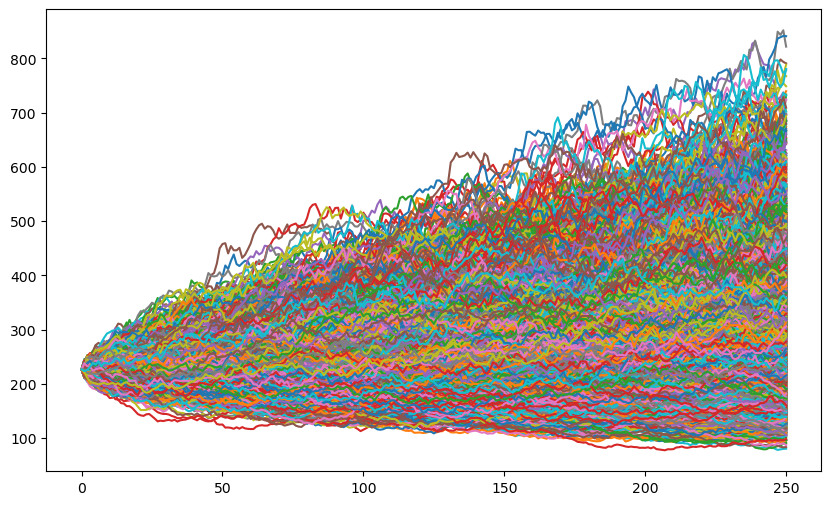

In [132]:
plt.figure(figsize = (10,6))
plt.plot(price_list)
plt.show()
#simulates n (n = 1,2,3..)iterations for k periods in the future (k = 1 is trading day, so k = 251 is one trading year)

In [133]:
price_list.mean()

257.1158511593496

as the number of iterations goes up, the simulation converges to a mean relative to the start and end dates selected in the beginning